In [25]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def factual_accuracy(result_dict, factual_answers):
    accuracy_list = []
    for key in result_dict:
        model_output = result_dict[key][0]['before_patching'].strip().lower()
        accuracy_list.append(1 if model_output in factual_answers[int(key)].strip().lower() else 0)
    return sum(accuracy_list)/len(result_dict.keys())

def patched_factual_accuracy(result_dict, factual_answers, layer_index=0):
    accuracy_list = []
    for key in result_dict:
        model_output = result_dict[key][layer_index]['after_patching'].strip().lower()
        accuracy_list.append(1 if model_output in factual_answers[int(key)].strip().lower() else 0)
    return sum(accuracy_list)/len(result_dict.keys())

def layer_wise_accuracy(result_dict):
    accuracy_list = []
    for key in result_dict:
        results = result_dict[key]
        accuracy = sum([1 if result['before_patching'] == result['after_patching'] else 0 for result in result_dict[key]])/len(result_dict[key])
        accuracy_list.append(np.round(accuracy,2))
    return accuracy_list

In [64]:
parent_dir = "patching_results"

model_specific_dir = "llama_31_8b_it"

In [65]:
file_dir = os.path.join(parent_dir,model_specific_dir)
os.listdir(file_dir)

['train_named_patching_result_llama_31_8b.json',
 'test_country_patching_result_llama_31_8b.json',
 'train_country_patching_result_llama_31_8b.json',
 'test_named_patching_result_llama_31_8b.json']

In [66]:
with open(os.path.join(file_dir,'test_named_patching_result_llama_31_8b.json')) as f:
    test_named_patching_result = json.load(f)

with open(os.path.join(file_dir,'train_country_patching_result_llama_31_8b.json')) as f:
    train_country_patching_result = json.load(f)

with open(os.path.join(file_dir,'train_named_patching_result_llama_31_8b.json')) as f:
    train_named_patching_result = json.load(f)
    
with open(os.path.join(file_dir,'test_country_patching_result_llama_31_8b.json')) as f:
    test_country_patching_result = json.load(f)
    
# with open(os.path.join(file_dir,'train_factual_answers_gemma_2_9b.json')) as f:
#     train_factual_answers = json.load(f)
    
# with open(os.path.join(file_dir,'test_factual_answers_gemma_2_9b.json')) as f:
#     test_factual_answers = json.load(f)

In [68]:
n_layers = len([entry['n_layers_patched'] for entry in train_named_patching_result['1']])
n_layers

32

In [69]:
train_named_patching_result_v2 = {}
for i in range(n_layers):
    train_named_patching_result_v2[str(i)] = []
    for key in train_named_patching_result:
        train_named_patching_result_v2[str(i)].append(train_named_patching_result[key][i])

In [70]:
test_named_patching_result_v2 = {}
for i in range(n_layers):
    test_named_patching_result_v2[str(i)] = []
    for key in test_named_patching_result:
        test_named_patching_result_v2[str(i)].append(test_named_patching_result[key][i])

In [71]:
train_country_patching_result_v2 = {}
for i in range(n_layers):
    train_country_patching_result_v2[str(i)] = []
    for key in train_country_patching_result:
        train_country_patching_result_v2[str(i)].append(train_country_patching_result[key][i])

In [72]:
test_country_patching_result_v2 = {}
for i in range(n_layers):
    test_country_patching_result_v2[str(i)] = []
    for key in test_country_patching_result:
        test_country_patching_result_v2[str(i)].append(test_country_patching_result[key][i])

In [57]:
factual_accuracy(train_named_patching_result, train_factual_answers)

0.8958333333333334

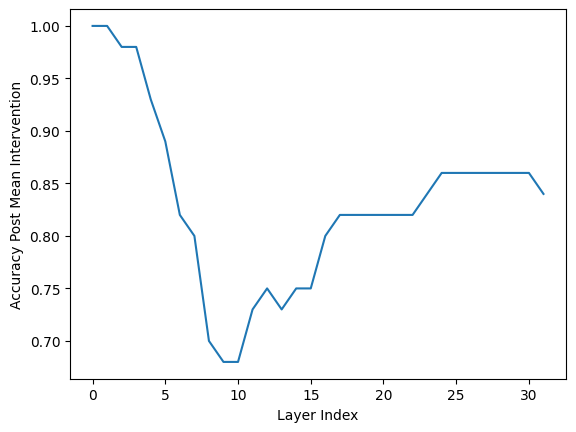

In [73]:
plt.plot(layer_wise_accuracy(train_named_patching_result_v2))
plt.xlabel("Layer Index")
plt.ylabel("Accuracy Post Mean Intervention")
plt.show()

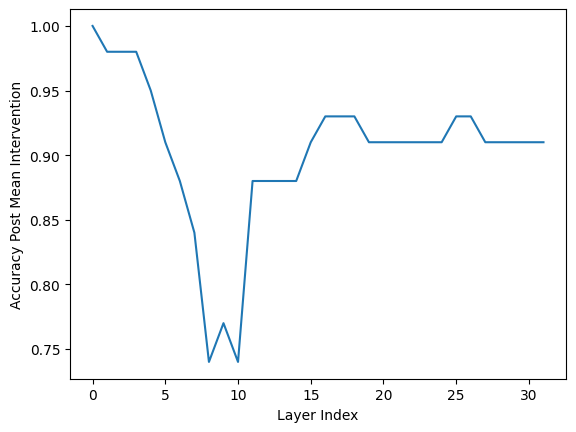

In [74]:
plt.plot(layer_wise_accuracy(test_named_patching_result_v2))
plt.xlabel("Layer Index")
plt.ylabel("Accuracy Post Mean Intervention")
plt.show()

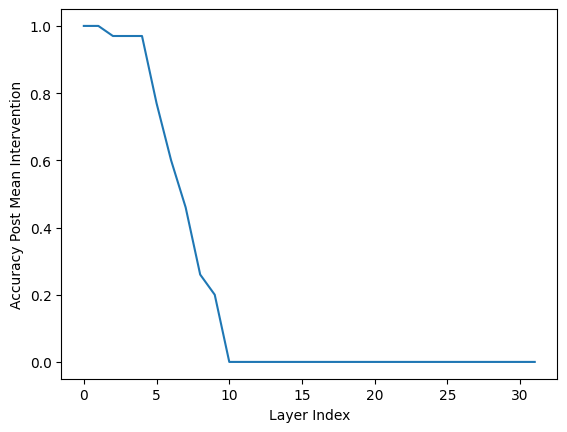

In [75]:
plt.plot(layer_wise_accuracy(train_country_patching_result_v2))
plt.xlabel("Layer Index")
plt.ylabel("Accuracy Post Mean Intervention")
plt.show()

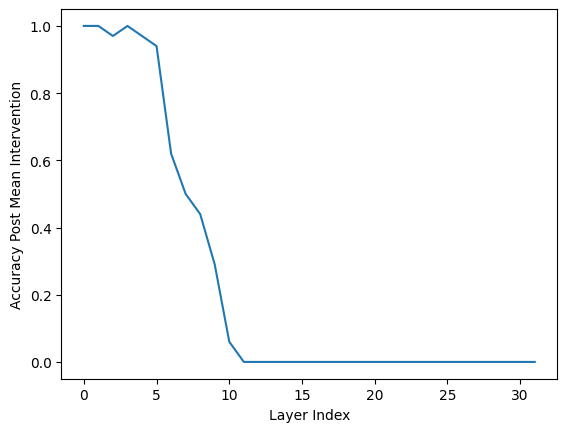

In [76]:
plt.plot(layer_wise_accuracy(test_country_patching_result_v2))
plt.xlabel("Layer Index")
plt.ylabel("Accuracy Post Mean Intervention")
plt.show()